In [41]:
# AT3 - RRP vs Other Pathologies

In [42]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install glob
!pip install directory_tree
!pip install tensorflow
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob

[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [43]:
import os
import sklearn
import numpy as np
import pandas as pd
import glob
import librosa 
from directory_tree import display_tree
path = r'C:/Users/princ/OneDrive - University of Strathclyde/Documents/university/fourth year/diss/AT3'


In [44]:
def windows(audio, window_size):
    start = 0
    while start < len(audio):
        #len(audio) is the total number of sample points for an audio file.
        yield start, int(start) + window_size #Retrieve the sample point index index of length window_size
        start += (window_size / 2) #Calculate the starting position of the next segment

In [45]:
# now only two categories: 0 - Non-RRP, 1 - RRP

path = 'C:/Users/princ/OneDrive - University of Strathclyde/Documents/university/fourth year/diss/AT3'

extracted_features_nonrrp = pd.DataFrame(columns=['features','label','names','classification'])
extracted_features_rrp    = pd.DataFrame(columns=['features','label','names','classification'])

def extract_features(parent_dir, sub_dirs, label, file_ext="*.wav", bands=60, frames=41):
    '''Wrangle audio data into 60x41x2 frames.'''

    window_size = 512 * (frames - 1)

    log_specgrams = []
    labels = []
    names = []

    search_patterns = [
        os.path.join(parent_dir, sub, "**", file_ext) 
        for sub in sub_dirs
    ]

    for search_pattern in search_patterns:
        for fn in glob.glob(search_pattern, recursive=True):

            sound_clip, s = librosa.load(fn)

            for (start, end) in windows(sound_clip, window_size):
                start = int(start)
                end = int(end)

                if len(sound_clip[start:end]) == window_size:

                    names.append(fn.replace(path, ''))

                    signal = sound_clip[start:end]
                    feature = []

                    D = np.abs(librosa.stft(signal))**2
                    melspec = librosa.feature.melspectrogram(S=D, n_mels=bands)
                    feature.append(librosa.amplitude_to_db(melspec))

                    melspec = librosa.feature.melspectrogram(y=signal, n_mels=bands)
                    feature.append(librosa.amplitude_to_db(melspec))

                    melspec = librosa.feature.mfcc(y=signal, sr=s, n_mfcc=bands)
                    feature.append(librosa.amplitude_to_db(melspec))

                    log_specgrams.append(feature)
                    labels.append(label)

    
    for i in range(len(log_specgrams)):
        log_specgrams[i] = np.array(log_specgrams[i])
        log_specgrams[i] = np.transpose(log_specgrams[i], (1, 2, 0))

    data = {
        'features': log_specgrams,
        'label': labels,
        'names': names
    }

    df = pd.DataFrame(data, columns=['features', 'label', 'names'])
    return df


In [46]:
path = 'C:/Users/princ/OneDrive - University of Strathclyde/Documents/university/fourth year/diss/AT3'

# Non-RRP -> label 0
extracted_features_nonrrp = extract_features(path, ['Non-RRP'], 0)
print(f"Non-RRP features extracted: {len(extracted_features_nonrrp)}")

# RRP -> label 1
extracted_features_rrp = extract_features(path, ['RRP'], 1)
print(f"RRP features extracted: {len(extracted_features_rrp)}")

Non-RRP features extracted: 1590
RRP features extracted: 746


In [47]:
## Data should be stored in directory fromat 
display_tree(path,max_depth=5)

AT3/
├── Non-RRP/
│   ├── Cyst/
│   │   ├── 14/
│   │   │   ├── 14a1.wav
│   │   │   ├── 14a2.wav
│   │   │   ├── 14a3.wav
│   │   │   ├── 14i1.wav
│   │   │   ├── 14i2.wav
│   │   │   ├── 14i3.wav
│   │   │   └── sentences/
│   │   │       ├── 14how hard did he hit him.wav
│   │   │       ├── 14my mama make lemon muffins.wav
│   │   │       ├── 14peter will keep at the peak.wav
│   │   │       ├── 14the blue spot is on the key again.wav
│   │   │       ├── 14we eat eggs every eastern.wav
│   │   │       └── 14we were away a year ago.wav
│   │   └── 26/
│   │       ├── 26a1.wav
│   │       ├── 26a2.wav
│   │       ├── 26a3.wav
│   │       ├── 26i1.wav
│   │       ├── 26i2.wav
│   │       ├── 26i3.wav
│   │       └── sentences/
│   │           ├── 26how hard did he hit him.wav
│   │           ├── 26my mama makes lemon muffins.wav
│   │           ├── 26peter will keep at the peak.wav
│   │           ├── 26the blue spot is on the key again.wav
│   │           ├── 26we eat eggs every easte

C:\Users\princ\AppData\Local\Temp\ipykernel_9668\1432419581.py:2: DeprecationWarning: The `display_tree` Function is Deprecated and will be Removed in a Future Release. Please use `DirectoryTree` Instead. End of Life Date is "31st December 2024".
  display_tree(path,max_depth=5)


In [48]:
## load all data 

nonrrp_folders = ['Non-RRP']
rrp_folders = ['RRP']

extracted_features_nonrrp = extract_features(path, nonrrp_folders, 0)
extracted_features_rrp    = extract_features(path, rrp_folders, 1)

extracted_features_nonrrp['classification'] = 'Non-RRP'
extracted_features_rrp['classification']    = 'RRP'

print(f"Non-RRP features extracted: {len(extracted_features_nonrrp)}")
print(f"RRP features extracted: {len(extracted_features_rrp)}")

Non-RRP features extracted: 1590
RRP features extracted: 746


In [49]:
if len(extracted_features_nonrrp) > len(extracted_features_rrp):
    size = len(extracted_features_rrp)
else:
    size = len(extracted_features_nonrrp)

In [50]:
extracted_features_rrp

,features,label,names,classification
0,"[[[-67.19664, -67.19664, 57.38644], [-55.15075...",1,\RRP\11\11a1.wav,RRP
1,"[[[-48.908085, -48.908085, 53.22222], [-48.546...",1,\RRP\11\11a1.wav,RRP
2,"[[[-51.94649, -51.94649, 53.20381], [-47.00390...",1,\RRP\11\11a1.wav,RRP
3,"[[[-67.07126, -67.07126, 52.808678], [-61.0066...",1,\RRP\11\11a1.wav,RRP
4,"[[[-58.928524, -58.928524, 52.74312], [-60.120...",1,\RRP\11\11a1.wav,RRP
...,...,...,...,...
741,"[[[-73.24041, -73.24041, 55.10424], [-68.51541...",1,\RRP\9\sentences\9we eat eggs every eastern.wav,RRP
742,"[[[-60.534683, -60.534683, 56.696873], [-58.76...",1,\RRP\9\sentences\9we eat eggs every eastern.wav,RRP
743,"[[[-47.97145, -47.97145, 56.93916], [-46.28584...",1,\RRP\9\sentences\9we were away a year ago.wav,RRP
744,"[[[-49.996468, -49.996468, 54.927948], [-45.87...",1,\RRP\9\sentences\9we were away a year ago.wav,RRP


In [51]:
extracted_features_nonrrp

,features,label,names,classification
0,"[[[-63.803143, -63.803143, 55.024143], [-61.77...",0,\Non-RRP\Cyst\14\14a1.wav,Non-RRP
1,"[[[-61.694374, -61.694374, 54.93177], [-54.552...",0,\Non-RRP\Cyst\14\14a2.wav,Non-RRP
2,"[[[-62.145485, -62.145485, 54.859753], [-64.10...",0,\Non-RRP\Cyst\14\14a3.wav,Non-RRP
3,"[[[-64.015205, -64.015205, 51.426273], [-63.30...",0,\Non-RRP\Cyst\14\14a3.wav,Non-RRP
4,"[[[-48.17854, -48.17854, 53.020176], [-53.0551...",0,\Non-RRP\Cyst\14\14a3.wav,Non-RRP
...,...,...,...,...
1585,"[[[-56.401577, -56.401577, 55.59391], [-57.648...",0,\Non-RRP\Vocal Cord Pulsy (VCP)\4\sentences\4w...,Non-RRP
1586,"[[[-56.891552, -56.891552, 55.971603], [-54.17...",0,\Non-RRP\Vocal Cord Pulsy (VCP)\4\sentences\4w...,Non-RRP
1587,"[[[-65.50765, -65.50765, 54.94554], [-60.16031...",0,\Non-RRP\Vocal Cord Pulsy (VCP)\4\sentences\4w...,Non-RRP
1588,"[[[-57.104668, -57.104668, 52.565514], [-60.28...",0,\Non-RRP\Vocal Cord Pulsy (VCP)\4\sentences\4w...,Non-RRP


In [52]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

train_nonrrp, test_nonrrp = train_test_split(extracted_features_nonrrp, test_size=0.2, random_state=42)
train_rrp,    test_rrp    = train_test_split(extracted_features_rrp,    test_size=0.2, random_state=42)

val_nonrrp, test_nonrrp = train_test_split(test_nonrrp, test_size=0.5, random_state=42)
val_rrp,    test_rrp    = train_test_split(test_rrp,    test_size=0.5, random_state=42)

train = pd.concat([train_nonrrp, train_rrp], ignore_index=True)
test  = pd.concat([test_nonrrp,  test_rrp],  ignore_index=True)
val   = pd.concat([val_nonrrp,   val_rrp],   ignore_index=True)

train = train.sample(frac=1, random_state=42).reset_index(drop=True)
val   = val.sample(frac=1, random_state=42).reset_index(drop=True)
test  = test.sample(frac=1, random_state=42).reset_index(drop=True)

print("train:", len(train))
print("val:", len(val))
print("test:", len(test))

X_train = np.array(train['features'].tolist())
X_val   = np.array(val['features'].tolist())
X_test  = np.array(test['features'].tolist())

y_train = to_categorical(train['label'].astype(int), num_classes=2)
y_val   = to_categorical(val['label'].astype(int),   num_classes=2)
y_test  = to_categorical(test['label'].astype(int),  num_classes=2)

names_val = val['names']


train: 1868
val: 234
test: 234


In [53]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

y_train_labels = train['label'].astype(int).to_numpy()

weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=y_train_labels
)

class_weights = {0: weights[0], 1: weights[1]}


In [54]:
print("X shape: ", X_train.shape)

X shape:  (1868, 60, 41, 3)


In [55]:
print("y shape: ", y_train.shape)

y shape:  (1868, 2)


In [56]:
import tensorflow as tf
import keras

METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [57]:
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,BatchNormalization
from tensorflow.keras.layers import Activation,MaxPooling2D,LeakyReLU


num_classes = 2

model = keras.Sequential()

# Layer 1 - Convolution with 24 filters + Maxpooling
model.add(Conv2D(64, (3,3), padding='valid', 
                input_shape=(60,41,3), strides=(1, 1)
                 ,kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2))) 

model.add(BatchNormalization(axis=1)) 
model.add(Dropout(0.5))
model.add(Activation('tanh'))

# Layer 2 - Convolution with 48 filters + Maxpooling 
model.add(Conv2D(64, (3,3)
                       ,kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2))) 
model.add(BatchNormalization(axis=1)) 
model.add(Dropout(0.5))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.03))


# Layer 3 - Convolution with 24 filters + Maxpooling
model.add(Conv2D(64, (3,3), padding='valid',
                 ))
model.add(BatchNormalization(axis=1)) 
model.add(Dropout(0.5))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.03))



model.add(layers.Flatten())

model.add(Dense(units=64))
model.add(LeakyReLU(alpha=0.03))

model.add(Dense(units=num_classes, activation='softmax'))

# Model compilation
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy',
                metrics=['categorical_accuracy']
)

C:\Users\princ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\princ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime 

num_epochs = 1000
num_batch_size = 64

checkpointer = ModelCheckpoint(
    filepath='CNN.keras',
    verbose=1,
    monitor='val_categorical_accuracy',
    save_best_only=True
)

early = EarlyStopping(
    monitor='val_categorical_accuracy',
    verbose=1,
    patience=100,
    mode='max',
    restore_best_weights=True
)

start = datetime.now()

hist = model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_val, y_val),
    callbacks=[checkpointer, early],
    class_weight=class_weights,   
    verbose=1
)

duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.5450 - loss: 1.1159
Epoch 1: val_categorical_accuracy improved from None to 0.32051, saving model to CNN.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - categorical_accuracy: 0.5102 - loss: 0.9120 - val_categorical_accuracy: 0.3205 - val_loss: 1.0655
Epoch 2/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.3940 - loss: 0.7695
Epoch 2: val_categorical_accuracy did not improve from 0.32051
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - categorical_accuracy: 0.5102 - loss: 0.7679 - val_categorical_accuracy: 0.3205 - val_loss: 0.7884
Epoch 3/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3530 - loss: 0.7598
Epoch 3: val_categorical_accuracy did not improve from 0.32051
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - categorical_accuracy: 0.4015 - loss: 0.7609 - val_categorical_accuracy: 0.3205 - val_loss: 0.7710
Epoch 4/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical

In [59]:
train_acc = model.evaluate(X_train,y_train)
val_acc = model.evaluate(X_val,y_val)
test_acc = model.evaluate(X_test,y_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.9866 - loss: 0.0916
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - categorical_accuracy: 0.9786 - loss: 0.1598
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.9402 - loss: 0.3995


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


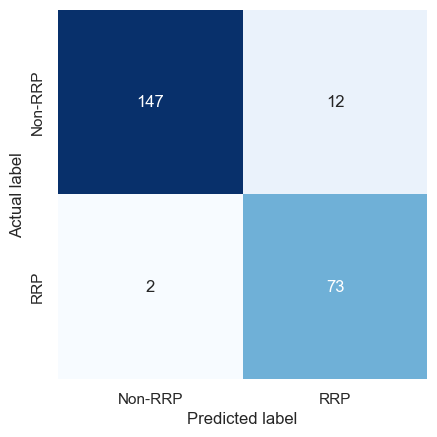

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

y_predicted = model.predict(X_test)

mat = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))

class_labels = ["Non-RRP", "RRP"]

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
             xticklabels=class_labels,
             yticklabels=class_labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

plt.savefig('heatmap.png')


In [61]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)

np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)

0.9786324501037598


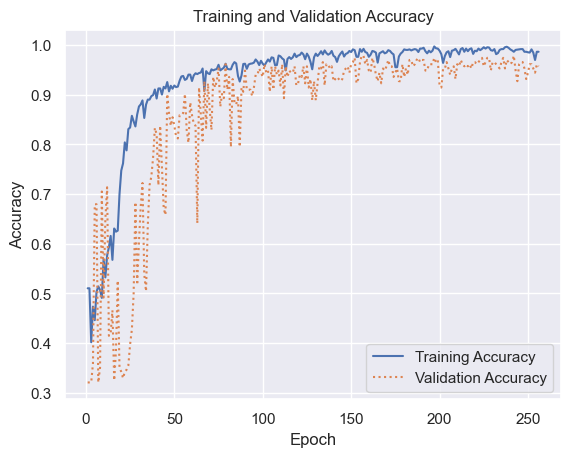

In [62]:
import matplotlib.pyplot as plt

acc = hist.history['categorical_accuracy']
val_acc = hist.history['val_categorical_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

plt.savefig('graph.png')

best_score = max(hist.history['val_categorical_accuracy'])

print(best_score)

In [63]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2%}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.9402 - loss: 0.3995
Test accuracy: 94.02%
